In [ ]:
student_id = "s224529554"
student_first_last_name = "Panha Ath"
print(student_id, student_first_last_name)

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dht22_data = pd.read_csv("dht22_data.csv", header=0, sep=",")
print (dht22_data.describe())

       temperature_c  humidity_pct
count    2145.000000   2145.000000
mean       22.146434     50.389324
std         0.152918      0.234208
min        21.800000     49.700000
25%        22.000000     50.200000
50%        22.200000     50.400000
75%        22.300000     50.600000
max        22.500000     51.800000


In [59]:
def fit_and_plot(data, tag):
    x = data[['temperature_c']].to_numpy()
    y = data['humidity_pct'].to_numpy()   # keep y as 1D

    model = LinearRegression().fit(x, y)
    y_hat = model.predict(x)
    r2 = r2_score(y, y_hat)

    tmin, tmax = float(x.min()), float(x.max())
    x_test = np.linspace(tmin, tmax, 100).reshape(-1, 1)
    y_pred = model.predict(x_test)

    plt.figure(figsize=(7,5))
    sns.scatterplot(data=data, x='temperature_c', y='humidity_pct', alpha=0.6, label="samples")
    plt.plot(x_test.ravel(), y_pred, color="red", linewidth=2, label="regression line")
    plt.title(f"Temperature vs Humidity — {tag}")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Humidity (%)")
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    print(f"[{tag.upper()}] slope={model.coef_[0]:.6f}, intercept={model.intercept_:.6f}, R²={r2:.6f}")

    return {"scenario": tag, "slope": model.coef_[0], "intercept": model.intercept_, "r2": r2}


[FULL] slope=-1.130476, intercept=75.425341, R²=0.544801


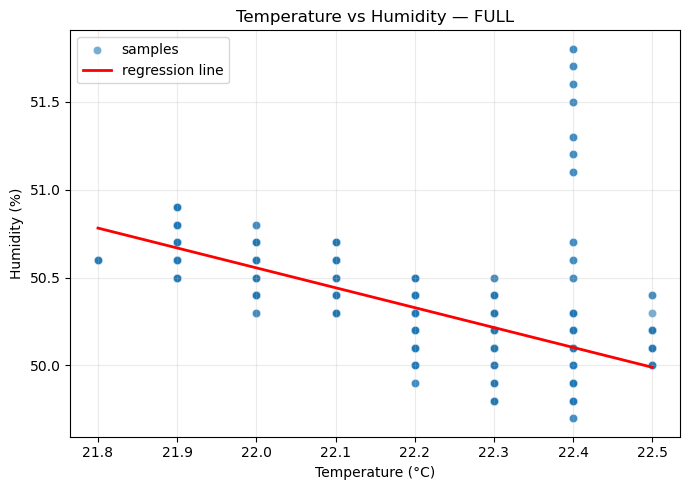

In [16]:
X = dht22_data[['temperature_c']].to_numpy()
y = dht22_data['humidity_pct'].to_numpy()

lr_full = LinearRegression().fit(X, y)
y_hat_full = lr_full.predict(X)
r2_full = r2_score(y, y_hat_full)

# 100 equally spaced temps between min/max (test temps)
tmin, tmax = float(X.min()), float(X.max())
x_test = np.linspace(tmin, tmax, 100).reshape(-1, 1)
y_test_pred = lr_full.predict(x_test)

print(f"[FULL] slope={lr_full.coef_[0]:.6f}, intercept={lr_full.intercept_:.6f}, R²={r2_full:.6f}")

# Plot scatter + regression line
plt.figure(figsize=(7,5))
sns.scatterplot(data=dht22_data, x='temperature_c', y='humidity_pct', alpha=0.6, label='samples')
plt.plot(x_test.ravel(), y_test_pred, label='regression line', linewidth=2, color='red')
plt.title("Temperature vs Humidity — FULL")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

[FILTERED] slope=-1.145333, intercept=75.754099, R²=0.542650


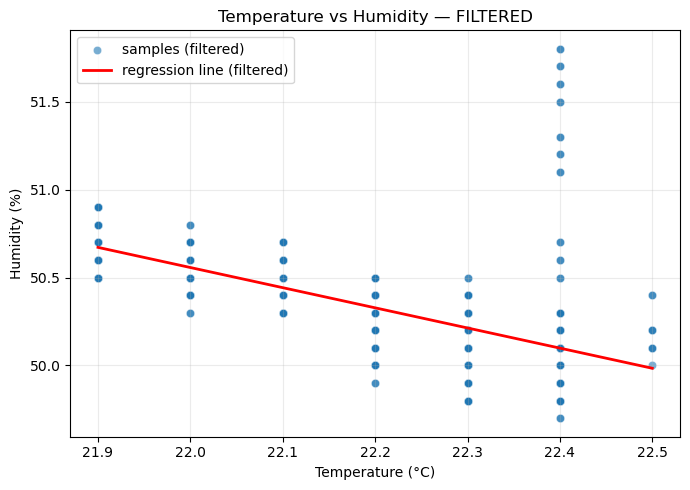

In [50]:
drop_each_side = 10

df_sorted = dht22_data.sort_values('temperature_c').reset_index(drop=True)
if len(df_sorted) > 2*drop_each_side:
    df_filt = df_sorted.iloc[drop_each_side: -drop_each_side].copy()
else:
    df_filt = df_sorted.copy()
    print("Not enough rows to drop extremes; using full dataset for filtered case.")
    
Xf = df_filt[['temperature_c']].to_numpy()
yf = df_filt['humidity_pct'].to_numpy()

lr_filt = LinearRegression().fit(Xf, yf)
yf_hat = lr_filt.predict(Xf)
r2_filt = r2_score(yf, yf_hat)

# same 100-point temperature range but based on filtered min/max
tmin_f, tmax_f = float(Xf.min()), float(Xf.max())
x_test_f = np.linspace(tmin_f, tmax_f, 100).reshape(-1, 1)
y_test_pred_f = lr_filt.predict(x_test_f)

print(f"[FILTERED] slope={lr_filt.coef_[0]:.6f}, intercept={lr_filt.intercept_:.6f}, R²={r2_filt:.6f}")

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_filt, x='temperature_c', y='humidity_pct', alpha=0.6, label='samples (filtered)')
plt.plot(x_test_f.ravel(), y_test_pred_f, label='regression line (filtered)', linewidth=2, color='red')
plt.title("Temperature vs Humidity — FILTERED")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

[FILTERED2] slope=-1.146016, intercept=75.769124, R²=0.541090


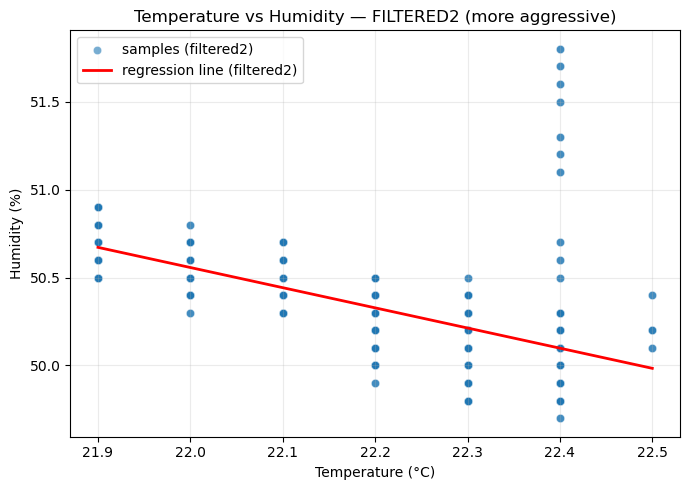

In [44]:
MORE_DROP = max(2, drop_each_side // 2)

if len(df_sorted) > 2*(drop_each_side + MORE_DROP):
    df_filt2 = df_sorted.iloc[drop_each_side + MORE_DROP: -(drop_each_side + MORE_DROP)].copy()
else:
    df_filt2 = None
    print("Skipping 'filtered2' there is not enough rows after aggressive drop.")

if df_filt2 is not None:
    Xf2 = df_filt2[['temperature_c']].to_numpy()
    yf2 = df_filt2['humidity_pct'].to_numpy()

    lr_filt2 = LinearRegression().fit(Xf2, yf2)
    yf2_hat = lr_filt2.predict(Xf2)
    r2_filt2 = r2_score(yf2, yf2_hat)

    tmin_f2, tmax_f2 = float(Xf2.min()), float(Xf2.max())
    x_test_f2 = np.linspace(tmin_f2, tmax_f2, 100).reshape(-1, 1)
    y_test_pred_f2 = lr_filt2.predict(x_test_f2)

    print(f"[FILTERED2] slope={lr_filt2.coef_[0]:.6f}, intercept={lr_filt2.intercept_:.6f}, R²={r2_filt2:.6f}")

    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df_filt2, x='temperature_c', y='humidity_pct', alpha=0.6, label='samples (filtered2)')
    plt.plot(x_test_f2.ravel(), y_test_pred_f2, label='regression line (filtered2)', linewidth=2, color='red')
    plt.title("Temperature vs Humidity — FILTERED2 (more aggressive)")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Humidity (%)")
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()